In [10]:
#Step 1: Load libraries and seed random number generator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split as split
from tensorflow.keras.optimizers import SGD
# To do: Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# To do: Import EarlyStopping from tensorflow.keras.callbacks
from tensorflow.keras.callbacks import EarlyStopping
import numpy
numpy.random.seed(7)  # fix random seed for reproducibility

In [11]:
#Step 2: Load the dataset and split it into train & test sets
dataset = numpy.loadtxt("https://raw.githubusercontent.com/wooihaw/datasets/main/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,:-1]
y = dataset[:,-1]
test_size = 0.33
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, random_state=7)

# To do: Scale fetures using StandardSCaler
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)


In [12]:
#Step 3: Define the neural network model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
#Step 4: Compile the neural network model
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [14]:
#Step 5: Fit the neural network to the dataset
# To do: Add early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(Xs_train, y_train, validation_data=(Xs_test, y_test), epochs=100, batch_size=8, callbacks=[es])


Epoch 1/100
65/65 [==============================] - 1s 9ms/step - loss: 0.6276 - accuracy: 0.6401 - val_loss: 0.6402 - val_accuracy: 0.6378
Epoch 2/100
65/65 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.6479 - val_loss: 0.6248 - val_accuracy: 0.6457
Epoch 3/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.6576 - val_loss: 0.6109 - val_accuracy: 0.6417
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5795 - accuracy: 0.6634 - val_loss: 0.5985 - val_accuracy: 0.6378
Epoch 5/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5674 - accuracy: 0.6712 - val_loss: 0.5873 - val_accuracy: 0.6299
Epoch 6/100
65/65 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.6809 - val_loss: 0.5774 - val_accuracy: 0.6457
Epoch 7/100
65/65 [==============================] - 0s 6ms/step - loss: 0.5452 - accuracy: 0.6848 - val_loss: 0.5692 - val_accuracy: 0.6535
Epoch 8/100
6

In [15]:
#Step 6: Evaluate the neural network model on the test set
scores = model.evaluate(Xs_test, y_test)
print(f"{model.metrics_names[0]}: {scores[0]:.2f}")
print(f"{model.metrics_names[1]}: {scores[1]:.2%}")

8/8 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7441
loss: 0.52
accuracy: 74.41%


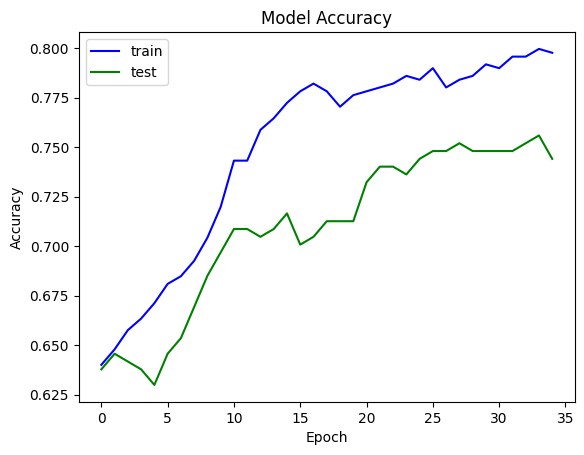

In [16]:
# Step 7: Plot the model accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b', label='train')
plt.plot(history.history['val_accuracy'], 'g', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='best')
plt.show()

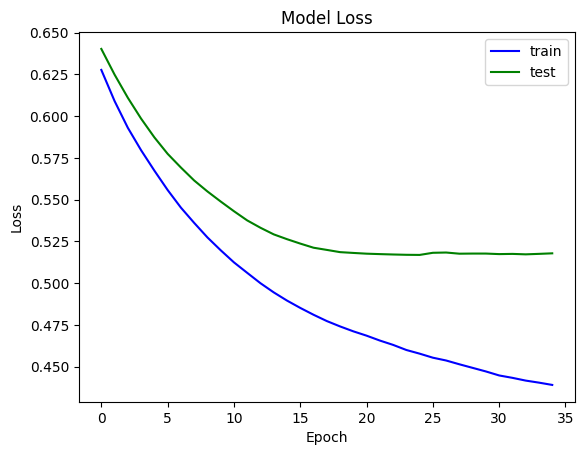

In [17]:
# To do: Plot the model loss for both training and testing data
plt.plot(history.history['loss'], 'b', label='train')
plt.plot(history.history['val_loss'], 'g', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='best')
plt.show()